In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df = pd.concat([df, pd.DataFrame(wine.target, columns=["wine_class"])], axis='columns')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [17]:
df["wine_class"].value_counts()

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

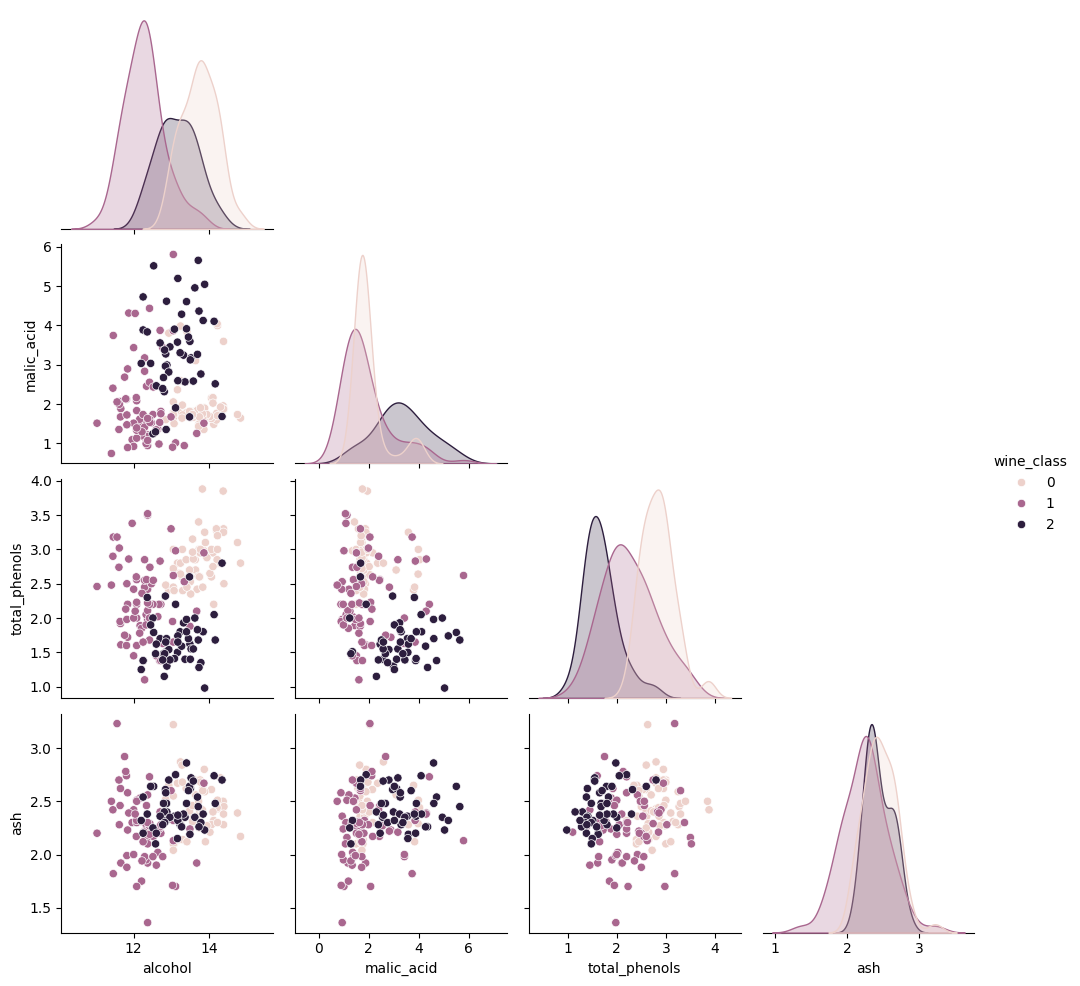

In [20]:
sns.pairplot(data=df[['alcohol', 'malic_acid', 'total_phenols', 'ash', 'wine_class']], hue='wine_class', corner=True)

In [21]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

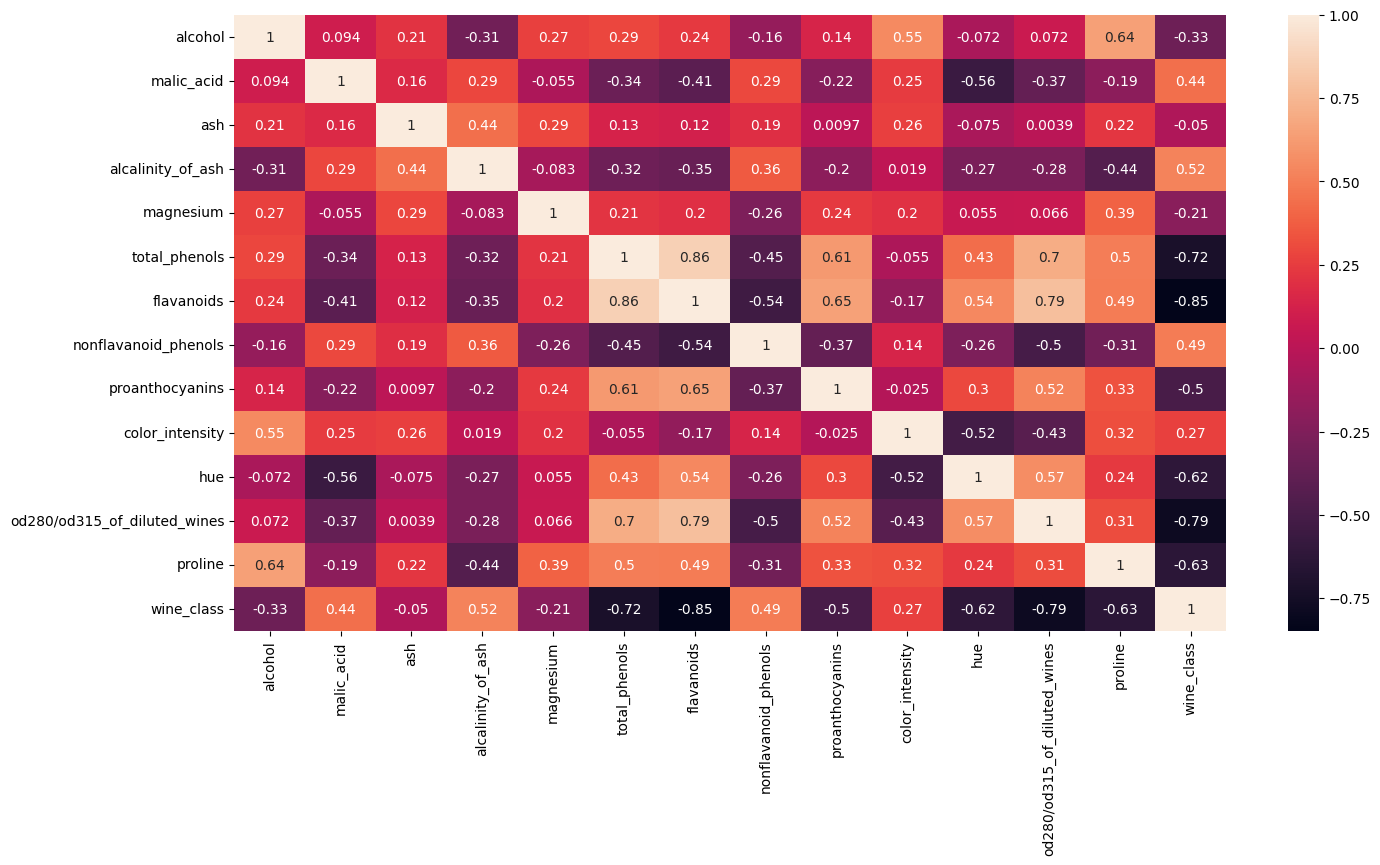

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[16, 8])
sns.heatmap(df.corr(), annot=True, ax=ax)

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, Y = df.drop(['wine_class'], axis='columns'), df['wine_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_KNN = KNeighborsClassifier(n_neighbors=1)

model_KNN.fit(scaled_X_train, Y_train)

Y_hat = model_KNN.predict(scaled_X_test)
Y_hat

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       1])

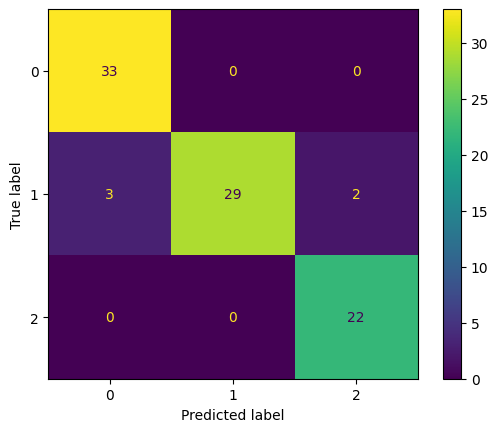

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(Y_test, Y_hat)
ConfusionMatrixDisplay(cm).plot()

In [32]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



[Text(0.5, 1.0, 'Elbowplot'), Text(0.5, 0, 'k'), Text(0, 0.5, 'error')]

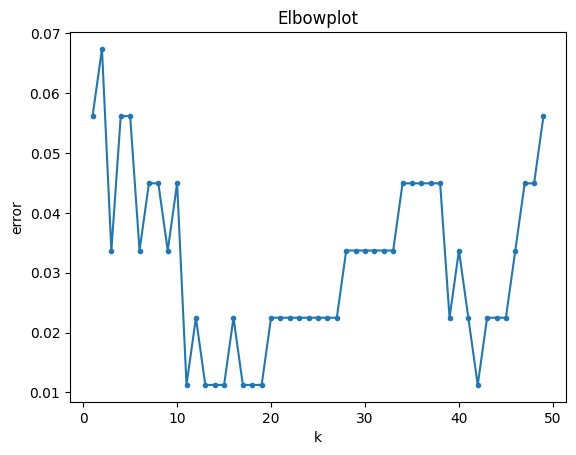

In [35]:
error = 1-accuracy_score(Y_test, Y_hat)
error_list = list()

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, Y_train)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list.append(1-accuracy_score(Y_test, Y_hat))

fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="Elbowplot", xlabel="k", ylabel="error")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



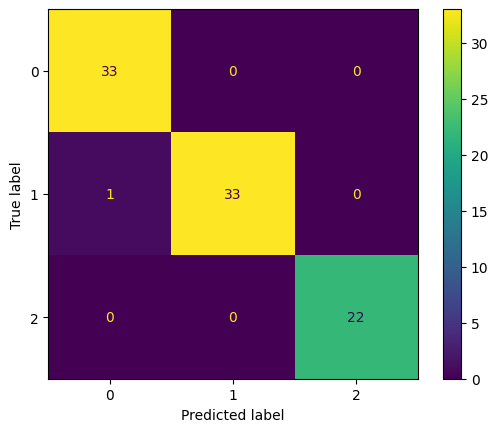

In [36]:
model_KNN = KNeighborsClassifier(n_neighbors=11)
model_KNN.fit(scaled_X_train, Y_train)
Y_hat = model_KNN.predict(scaled_X_test)

print(classification_report(Y_test, Y_hat))

cm = confusion_matrix(Y_test, Y_hat)
ConfusionMatrixDisplay(cm).plot()